In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
data.shape

(158, 12)

In [5]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### Checking Distribution of data

In [8]:
df= data.drop(columns=["Country","Region"], axis=1)

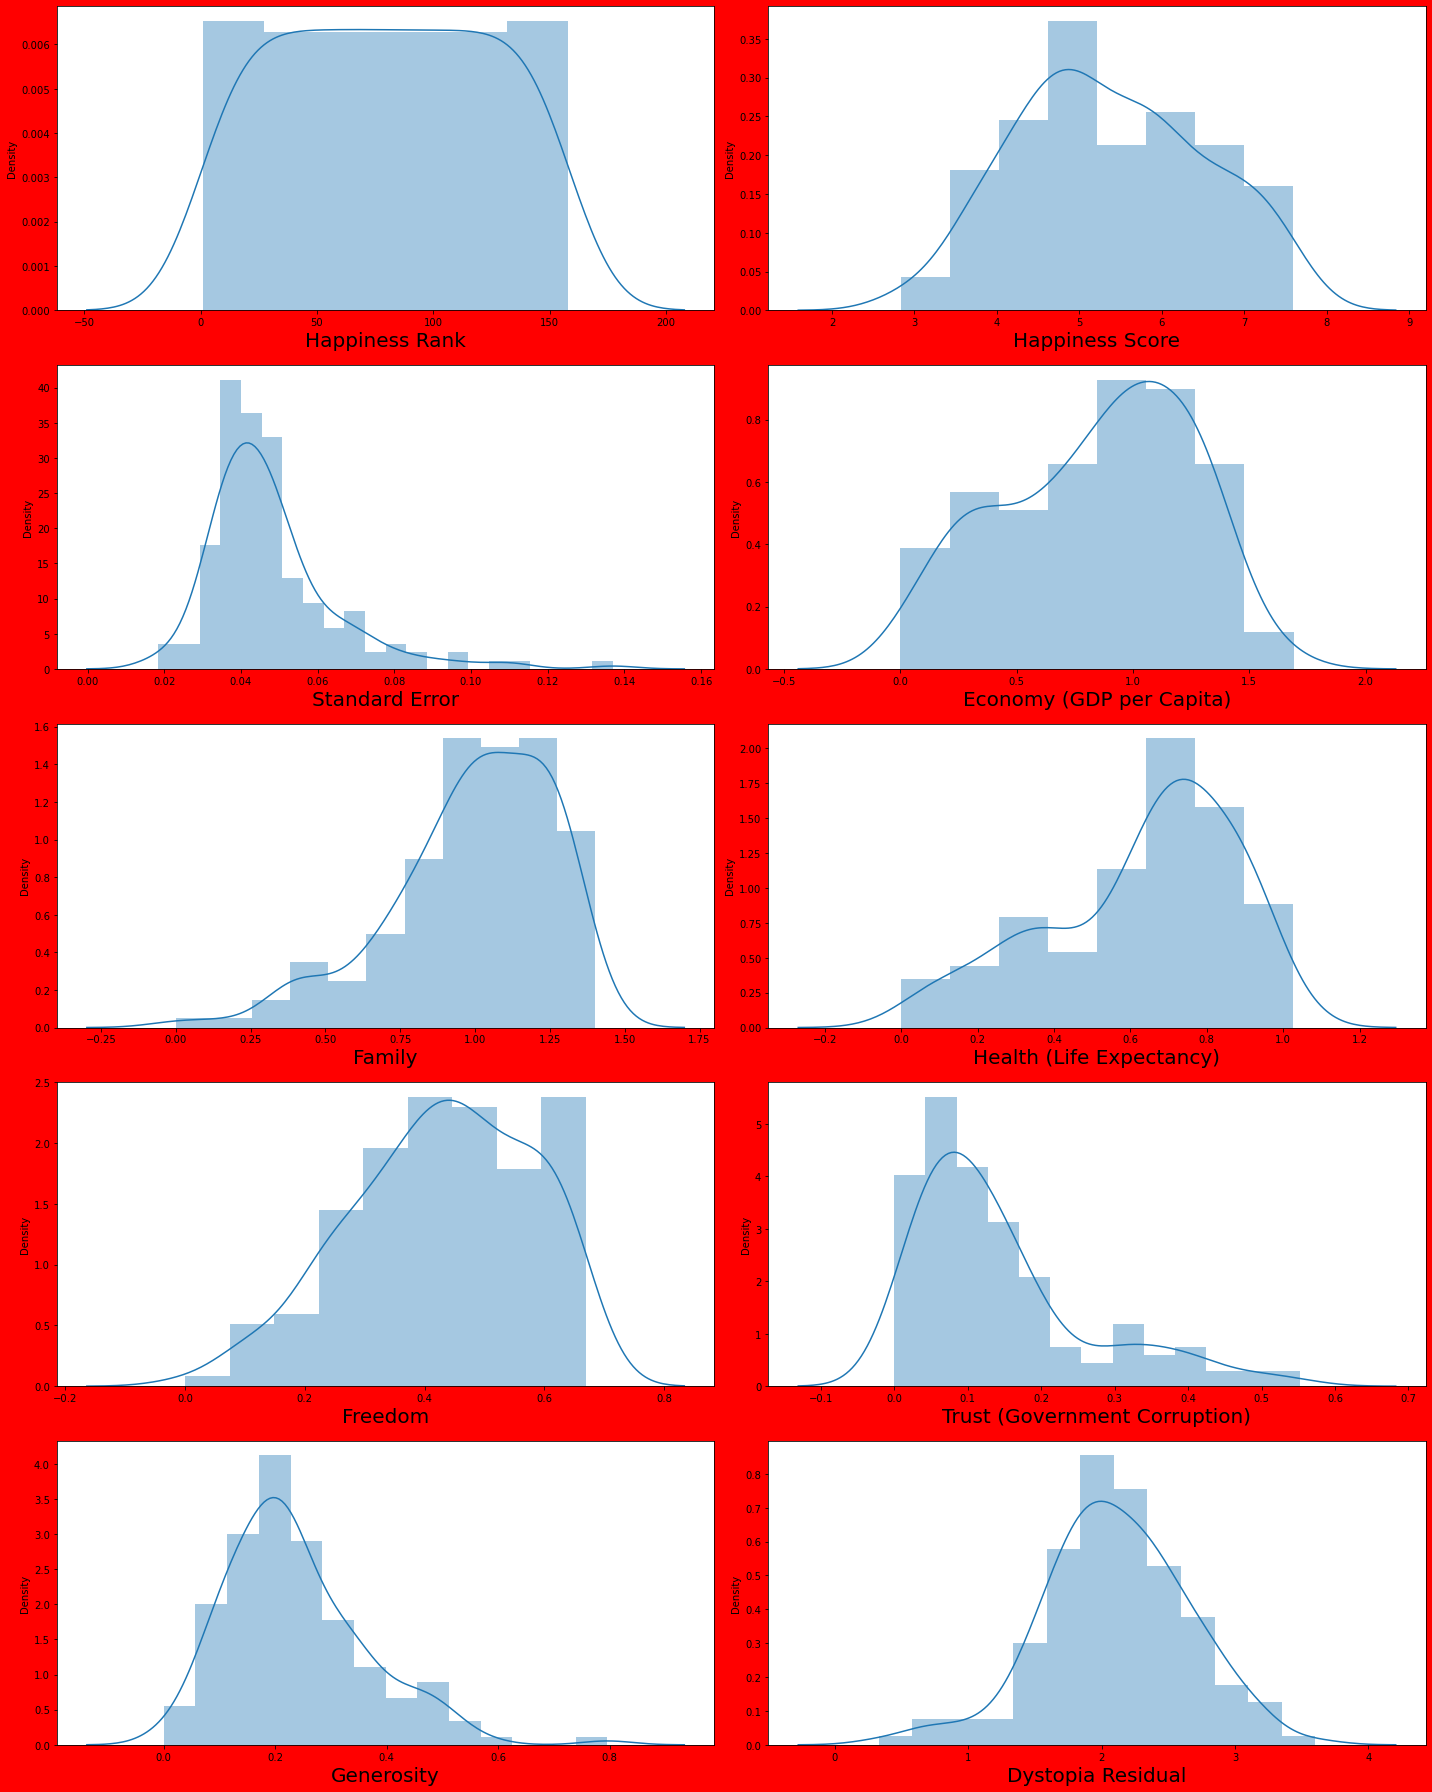

In [9]:
## Plotting dist plot
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Detecting outliers using boxplot

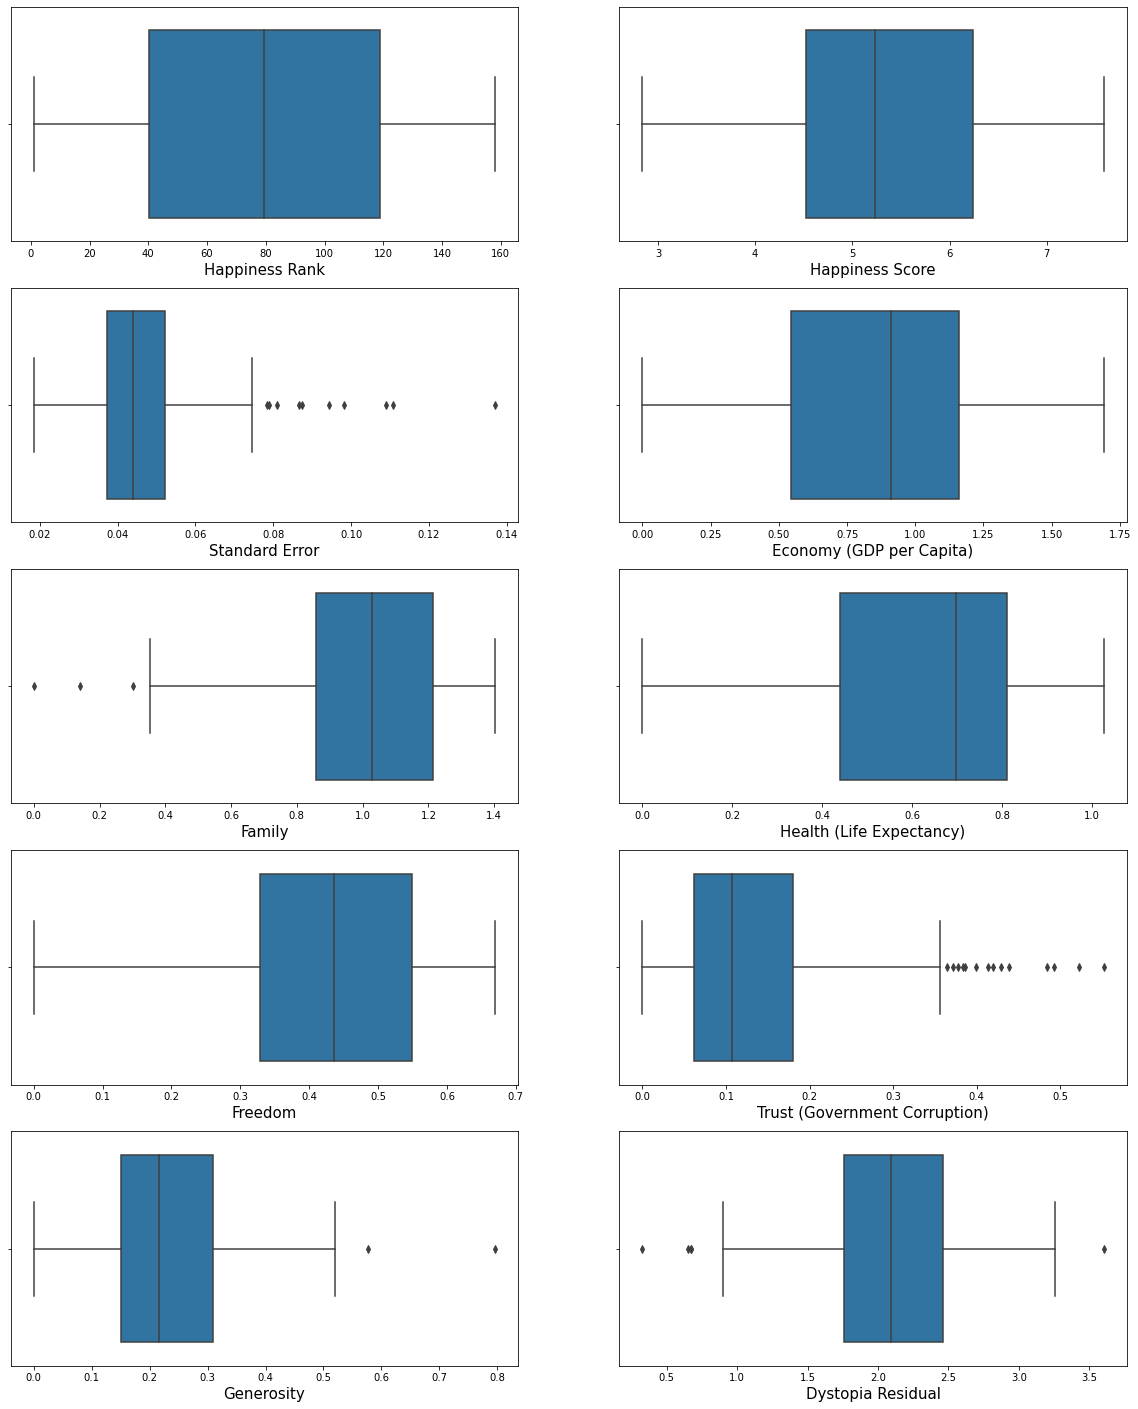

In [10]:
plt.figure(figsize=(20,25))
graph=1
for col in df:
    if graph<=10:
        ax=plt.subplot(5,2,graph)
        sns.boxplot(df[col],orient='v')
        plt.xlabel(col, fontsize=15)
    graph+=1
plt.show()

##### From the above multivariate analysis we observe outliers and skewness in data but we have very less amount of data so we dont want to loose more of our data so we'll proceed with our EDA part and check for correlation

### Check for Correlation

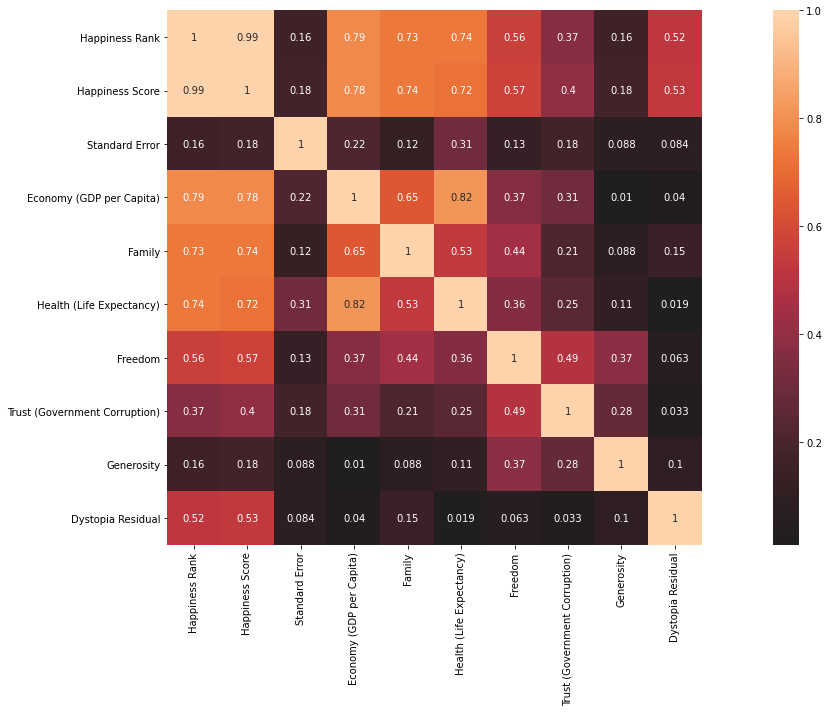

In [11]:
corr= df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True,square=True,center=0, fmt='.2g')
plt.tight_layout()


##### From heat map we observe that GDP of country and health are somewhat correlated. We'll now check the relation using scatterplot Also Family, Health and GDP are the major factors effecting to the happiness score (with correlation >0.7)

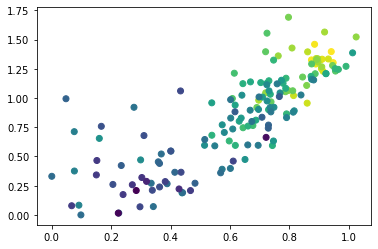

In [12]:
plt.scatter(x=data["Health (Life Expectancy)"], y= data["Economy (GDP per Capita)"], c= data["Happiness Score"])

##### From above plot we observe that Economy and health of a country are related. 

### Family v/s Happiness Score

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

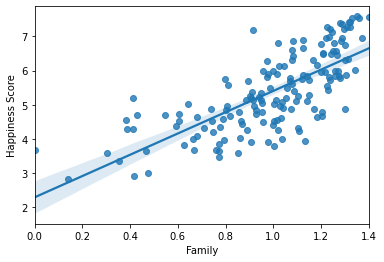

In [13]:
sns.regplot(x="Family", y="Happiness Score", data= data)

### Health (Life Expectancy) v/s Happiness Score 

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

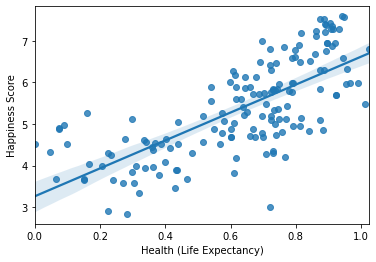

In [14]:
sns.regplot(x="Health (Life Expectancy)", y= "Happiness Score", data = data)


### Economy(GDP per capita) v/s Happiness Score

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

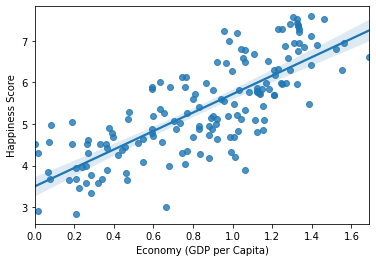

In [15]:
sns.regplot(x= "Economy (GDP per Capita)", y= "Happiness Score", data=data)


##### The above regression plots shows how GDP, Family and Health are effecting Happiness Score

In [16]:
count= data["Region"].value_counts()
count

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [17]:
region=["Sub-Saharan Africa","Central and Eastern Europe","Latin America and Caribbean",
        "Western Europe","Middle East and Northern Africa","Southeastern Asia","Southern Asia",
        "Eastern Asia","North America","Australia and New Zealand"]
l=[]
for i in region:
    index= np.where(data["Region"]==i)
    l.append(data["Happiness Score"].loc[index].mean())


In [18]:
region_df=pd.DataFrame()
region_df["region"]=region
region_df["Score"]=l
print("Region with their average score: \n")
region_df

Region with their average score: 



,region,Score
0,Sub-Saharan Africa,4.202800
1,Central and Eastern Europe,5.332931
2,Latin America and Caribbean,6.144682
3,Western Europe,6.689619
4,Middle East and Northern Africa,5.406900
5,Southeastern Asia,5.317444
6,Southern Asia,4.580857
7,Eastern Asia,5.626167
8,North America,7.273000
9,Australia and New Zealand,7.285000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

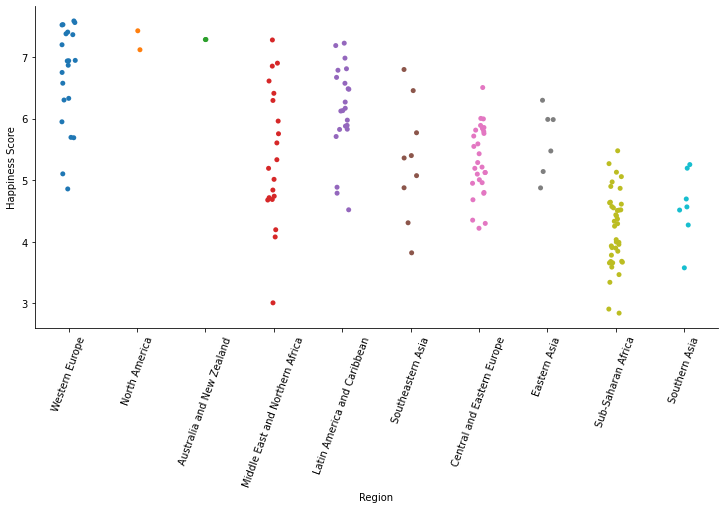

In [19]:
sns.catplot(x="Region", y= "Happiness Score", data= data, aspect=2)
plt.xticks(rotation=70)

### Model Building

In [20]:
data= data.drop(columns=["Happiness Rank","Country","Region"],axis=1)

In [21]:
x=data.drop(columns=["Happiness Score"],axis=1)
y= data["Happiness Score"]

In [22]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=355)

### Linear Regression

In [23]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
lm.score(x_test,y_test)

0.9999999534255134

In [24]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.9999999406680472

### KNeighbors Regression

In [25]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
knn.score(x_test,y_test)

0.8765152282833643

### DecisionTree Regression

In [26]:
clf= DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
clf.score(x_test,y_test)

0.7912624249705039

### Support Vector Regression

In [27]:
svr= SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)
svr.score(x_test,y_test)

0.9098646384006576

### Model Evaluation
Computing Cross Validation Score for each model

### Linear Regression

In [28]:
cross_val_score(lasso_reg,x_train, y_train,cv=5).mean()


0.9999998995886301

### KNeighbors Regression

In [29]:
cross_val_score(knn,x_train, y_train,cv=5).mean()

0.864147159013965

### DecisionTree Regression

In [30]:
cross_val_score(clf,x_train, y_train,cv=5).mean()

0.6955071176468406

### Support Vector Regression

In [31]:
cross_val_score(svr,x_train, y_train,cv=5).mean()

0.9244037617031994

### Hyper-parametric Tuning 

In [32]:
lasso_reg= LassoCV()
param={'fit_intercept':[True,False], 'normalize':[True,False],
      'max_iter':[100,1000,500], 'eps':[0.001,0.002,0.003],}
grid_search=GridSearchCV(estimator=lasso_reg, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'eps': 0.001, 'fit_intercept': True, 'max_iter': 100, 'normalize': True}


In [33]:
lasso_reg= LassoCV(eps=0.001,fit_intercept=True, max_iter=100, normalize=True)
lasso_reg.fit(x_train,y_train)
y_pred= lasso_reg.predict(x_test)
print("R2 Score= ",r2_score(y_test,y_pred))

R2 Score=  0.9999980686592813


In [34]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  2.8309151607417783e-06


### Saving Model

In [35]:
filename= "HappinessReport_model.pickle"
pickle.dump(clf,open(filename,'wb'))